In [2]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np

import time
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sb
###

from scipy.stats import pearsonr, zscore
from MFDFA import fgn
# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sb.set()
from tqdm import tqdm

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

import sys
sys.path.insert(0, '/directory/tothe/handshakefile/')

import stylised_facts.stylised_facts_data_utilities.createLOB as createLOB

%matplotlib inline
import os
os.getcwd()

'/home/ak/Documents/Research/PaperCode'

In [125]:
folder= '/media/ak/My Passport/Experiment Data/ActivityClockData/'
folderList = os.listdir(folder)
folderList
symbosl =['FB1','JB1','FV1','G_1']

['0EMAData_FV1_Comdty_20180502_.pkl',
 '1AtoCorrelData_G_1_Comdty_20180424_.pkl',
 '2AtoCorrelData_DU1_Comdty_20180417_.pkl',
 '2EMAData_FV1_Comdty_20180507_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180416_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180417_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180418_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180419_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180420_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180423_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180424_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180425_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180426_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180427_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180430_.pkl',
 '0AtoCorrelData_DU1_Comdty_20180502_.pkl',
 'ClocksData_FV1_Comdty_20180418_.pkl',
 'ClocksData_FV1_Comdty_20180419_.pkl',
 'ClocksData_FV1_Comdty_20180420_.pkl',
 'ClocksData_FV1_Comdty_20180423_.pkl',
 'ClocksData_FV1_Comdty_20180424_.pkl',
 'ClocksData_FV1_Comdty_20180425_.pkl',
 'ClocksData_FV1_Comdty_20180426_.pkl',
 'ClocksData_FV1_Comdty_2018

In [159]:


correlDU1ListOne =list(np.sort([s for s in folderList if ('AtoCor') in s and ('1AtoCorrelData_FB1') in s]))
correlDU1ListZero =list(np.sort([s for s in folderList if ('AtoCor') in s and ('0AtoCorrelData_FB1') in s]))
correlDU1ListTwo =list(np.sort([s for s in folderList if ('AtoCor') in s and ('2AtoCorrelData_FB1') in s]))

In [160]:
correlDU1List_1 =list(np.sort(correlDU1List))

In [161]:
# pd=DataFrame.from_dict(list, orient='columns', dtype=None)

In [162]:

DU1CorrelVolBar= []
for idx, _ in enumerate(correlDU1ListOne):
    fileLoc = "".join((folder, correlDU1ListOne[idx]))
    pickle_to_file = pickle.load(open(fileLoc, "rb"))
    DU1CorrelVolBar.append(pickle_to_file)


In [163]:
DU1CorrelTickBar= []
for idx, _ in enumerate(correlDU1ListZero):
    fileLoc = "".join((folder, correlDU1ListZero[idx]))
    pickle_to_file = pickle.load(open(fileLoc, "rb"))
    DU1CorrelTickBar.append(pickle_to_file)

In [164]:
DU1CorrelDolVolBar= []
for idx, _ in enumerate(correlDU1ListTwo):
    fileLoc = "".join((folder, correlDU1ListTwo[idx]))
    pickle_to_file = pickle.load(open(fileLoc, "rb"))
    DU1CorrelDolVolBar.append(pickle_to_file)

In [165]:
dfAutoCorrelOne =pd.DataFrame.from_dict(DU1CorrelVolBar, orient='columns', dtype=None).T
dfAutoCorrelZero =pd.DataFrame.from_dict(DU1CorrelTickBar, orient='columns', dtype=None).T
dfAutoCorrelTwo =pd.DataFrame.from_dict(DU1CorrelDolVolBar, orient='columns', dtype=None).T

/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
No handles with labels found to put in legend.
/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


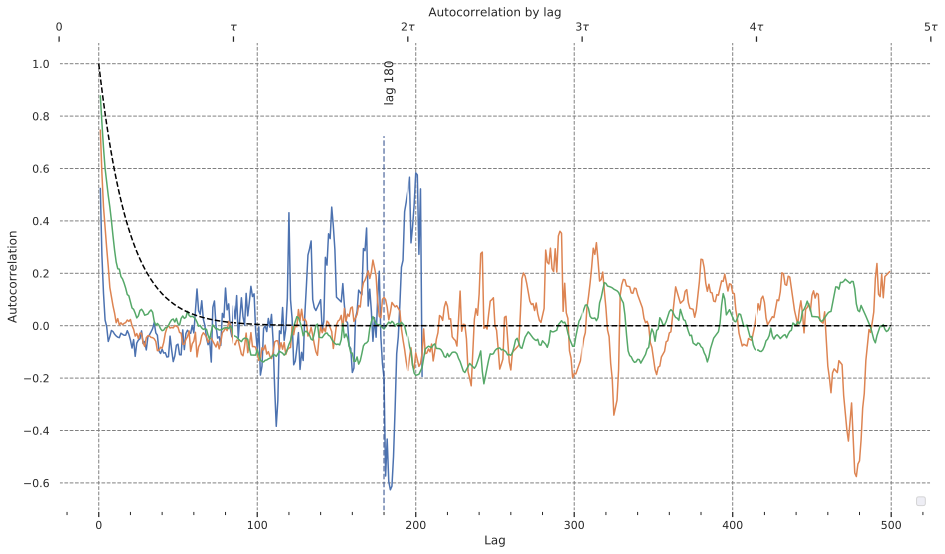

In [166]:
title='MedianAutocorrelationForSymbolFB1'
dfs = [dfAutoCorrelZero, dfAutoCorrelOne, dfAutoCorrelTwo]
from matplotlib.ticker import AutoMinorLocator
size = 5
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.75,
          'ytick.labelsize': size * 0.75,
          'axes.titlepad': 25}
_=fig, ax1 = plt.subplots(figsize=(16, 9),constrained_layout=True)
ax1.grid(color='grey', linestyle='--', linewidth=1)
ax2 = ax1.twiny()
ax1.set_facecolor('white')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
for idx, df in enumerate(dfs):
    ax1.plot( df.median(axis=1))
ax1.set_title('Autocorrelation by lag')
ax1.set_ylabel('Autocorrelation')
ax1.set_xlabel('Lag')
# Initial value of y at t=0, lifetime in s
N, tau = 1, 19
xlineLevel=180
# Maximum time to consider (s)
tmax = 500
ntau = tmax // tau + 1
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 400)
y = N * np.exp(-t / tau)

# fig = plt.figure()
# ax = fig.add_subplot(111)
ax1.plot(t, y, color='black', linestyle='--')
ax1.grid(True)
#     axvline(x=.5, ymin=0.25, ymax=0.75)
_=ax1.axvline(x=xlineLevel, ymin=0.0, ymax=0.8, ls='--', alpha=0.7, color='#334f8d')
_=ax1.text(xlineLevel, 0.85, 'lag ' + str(xlineLevel), rotation=90, fontsize=12)
_=xtick_labels = [r'$0$', r'$\tau$'] + [r'${}\tau$'.format(k) for k in range(2, ntau)]
_=ax1.legend(loc='lower right')
_=ax2.set_xticklabels(xtick_labels)

plt.savefig('/home/ak/Documents/Research/Papers/figures/' + title + '.png', dpi=150)
fig.tight_layout()

In [11]:
type(pickle_to_file)

dict

In [87]:
dots = sns.load_dataset("dots")

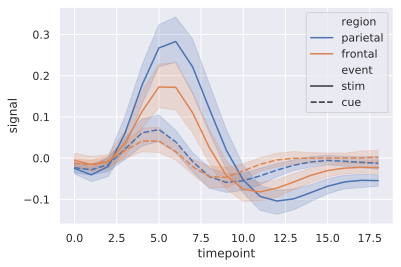

In [101]:
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [103]:
fmri.head(2)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883


In [116]:
folderList = os.listdir(folder)


In [106]:
DU1Clocks =list(np.sort([s for s in folderList if ('Clocks') in s and ('_DU1') in s]))

In [110]:
clocksIdx =1

fileLoc = "".join((folder, DU1Clocks[clocksIdx]))
dFclocksSample = pickle.load(open(fileLoc, "rb"))

In [114]:
sampleKeys = list(dFclocksSample.keys() )